In [ ]:
import networkx as nx
import pandas as pd
from google.colab import files
files.upload()

Saving football.edges to football.edges


{'football.edges': b'0\t1\n0\t4\n0\t9\n0\t16\n0\t23\n0\t33\n0\t35\n0\t41\n0\t65\n0\t90\n0\t93\n0\t104\n1\t25\n1\t27\n1\t33\n1\t37\n1\t45\n1\t57\n1\t89\n1\t101\n1\t103\n1\t105\n1\t109\n2\t3\n2\t6\n2\t13\n2\t14\n2\t15\n2\t47\n2\t60\n2\t64\n2\t72\n2\t74\n2\t100\n2\t106\n3\t5\n3\t11\n3\t26\n3\t40\n3\t52\n3\t58\n3\t72\n3\t74\n3\t81\n3\t84\n3\t102\n4\t5\n4\t9\n4\t16\n4\t23\n4\t28\n4\t41\n4\t69\n4\t93\n4\t104\n4\t108\n5\t10\n5\t11\n5\t52\n5\t74\n5\t81\n5\t84\n5\t90\n5\t97\n5\t98\n5\t107\n6\t7\n6\t32\n6\t39\n6\t47\n6\t55\n6\t58\n6\t60\n6\t64\n6\t85\n6\t100\n6\t106\n7\t8\n7\t21\n7\t22\n7\t40\n7\t68\n7\t73\n7\t77\n7\t78\n7\t82\n7\t108\n7\t111\n8\t9\n8\t21\n8\t22\n8\t41\n8\t51\n8\t68\n8\t77\n8\t78\n8\t90\n8\t111\n9\t16\n9\t22\n9\t23\n9\t41\n9\t64\n9\t93\n9\t104\n9\t108\n10\t11\n10\t60\n10\t72\n10\t74\n10\t81\n10\t84\n10\t98\n10\t102\n10\t107\n11\t24\n11\t28\n11\t50\n11\t69\n11\t90\n11\t97\n11\t104\n12\t13\n12\t14\n12\t17\n12\t18\n12\t26\n12\t34\n12\t36\n12\t38\n12\t43\n12\t85\n13\t15\n13\t32\n13\

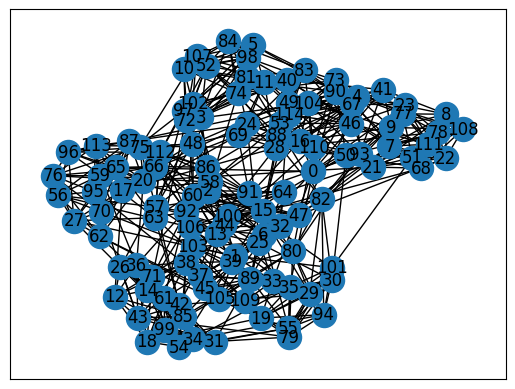

In [ ]:
df=pd.read_csv('/content/football.edges',sep='\t',names=['n1','n2'])
G=nx.from_pandas_edgelist(df,'n1','n2',create_using=nx.Graph())
nx.draw_networkx(G)

In [ ]:
def set_node(G, communities):
    for c, v_c in enumerate(communities):
        for v in v_c:
            G.nodes[v]['community'] = c + 1

def set_edge(G):
    for v, w in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            G.edges[v, w]['community'] = 0

def get_color(i=1, r_off=1, g_off=2, b_off=3):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low = 0.1
    high = 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 3) % n) / (n - 1)
    b = low + span * (((i + b_off) * 3) % n) / (n - 1)
    return r, g, b


In [ ]:
from networkx.algorithms import community
result=community.girvan_newman(G)
communities1=next(result)
print(len(communities1))
print(communities1)
list(enumerate(communities1))

2
({0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 16, 21, 22, 23, 24, 28, 32, 39, 40, 41, 46, 47, 49, 50, 51, 52, 53, 60, 64, 67, 68, 69, 72, 73, 74, 77, 78, 81, 82, 83, 84, 88, 90, 93, 98, 100, 102, 104, 106, 107, 108, 110, 111, 114}, {1, 12, 14, 17, 18, 19, 20, 25, 26, 27, 29, 30, 31, 33, 34, 35, 36, 37, 38, 42, 43, 44, 45, 48, 54, 55, 56, 57, 58, 59, 61, 62, 63, 65, 66, 70, 71, 75, 76, 79, 80, 85, 86, 87, 89, 91, 92, 94, 95, 96, 97, 99, 101, 103, 105, 109, 112, 113})


[(0,
  {0,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   13,
   15,
   16,
   21,
   22,
   23,
   24,
   28,
   32,
   39,
   40,
   41,
   46,
   47,
   49,
   50,
   51,
   52,
   53,
   60,
   64,
   67,
   68,
   69,
   72,
   73,
   74,
   77,
   78,
   81,
   82,
   83,
   84,
   88,
   90,
   93,
   98,
   100,
   102,
   104,
   106,
   107,
   108,
   110,
   111,
   114}),
 (1,
  {1,
   12,
   14,
   17,
   18,
   19,
   20,
   25,
   26,
   27,
   29,
   30,
   31,
   33,
   34,
   35,
   36,
   37,
   38,
   42,
   43,
   44,
   45,
   48,
   54,
   55,
   56,
   57,
   58,
   59,
   61,
   62,
   63,
   65,
   66,
   70,
   71,
   75,
   76,
   79,
   80,
   85,
   86,
   87,
   89,
   91,
   92,
   94,
   95,
   96,
   97,
   99,
   101,
   103,
   105,
   109,
   112,
   113})]

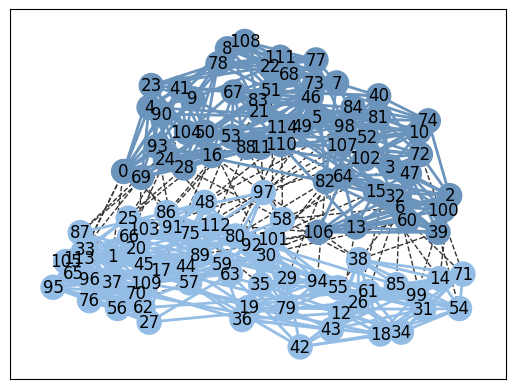

In [ ]:
set_node(G, communities1)
set_edge(G)

node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = [get_color(G.edges[e]['community']) for e in internal]

dolph = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos=dolph, node_color=node_color)
nx.draw_networkx_labels(G, pos=dolph)
nx.draw_networkx_edges(G, pos=dolph, edgelist=external, edge_color='#333333', width=1, style='dashed')
nx.draw_networkx_edges(G, pos=dolph, edgelist=internal, edge_color=internal_color, width=2)


In [ ]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities
communities2=community.greedy_modularity_communities(G)
print(len(communities2))
print(communities2)

6
[frozenset({65, 66, 70, 75, 76, 17, 20, 86, 87, 27, 91, 92, 95, 96, 97, 36, 42, 44, 48, 112, 113, 56, 57, 58, 59, 62, 63}), frozenset({67, 68, 7, 8, 73, 9, 77, 78, 16, 21, 22, 23, 88, 104, 41, 108, 110, 46, 111, 49, 114, 51, 53}), frozenset({0, 1, 79, 80, 82, 19, 89, 25, 93, 29, 30, 94, 33, 35, 101, 37, 103, 105, 109, 45, 55}), frozenset({2, 3, 4, 5, 69, 72, 74, 10, 11, 81, 83, 84, 24, 90, 28, 98, 102, 40, 107, 50, 52}), frozenset({34, 99, 38, 71, 43, 12, 14, 18, 85, 54, 26, 61, 31}), frozenset({64, 32, 100, 6, 39, 106, 13, 15, 47, 60})]


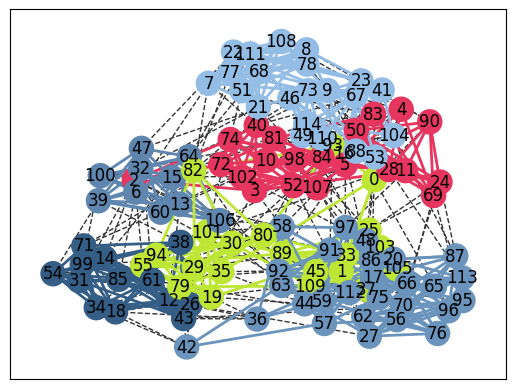

In [ ]:
set_node(G, communities2)
set_edge(G)

node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = [get_color(G.edges[e]['community']) for e in internal]

dolph = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos=dolph, node_color=node_color)
nx.draw_networkx_labels(G, pos=dolph)
nx.draw_networkx_edges(G, pos=dolph, edgelist=external, edge_color='#333333', width=1, style='dashed')
nx.draw_networkx_edges(G, pos=dolph, edgelist=internal, edge_color=internal_color, width=2)


In [20]:
from networkx.algorithms.community.modularity_max import naive_greedy_modularity_communities
communities3=community.naive_greedy_modularity_communities(G)
print(len(communities3))
print(communities3)#need a lot time to run this code

6
[frozenset({0, 3, 4, 5, 9, 10, 11, 16, 23, 24, 28, 40, 41, 46, 49, 50, 52, 53, 67, 69, 72, 73, 74, 81, 83, 84, 88, 90, 93, 98, 102, 104, 107, 110, 114}), frozenset({65, 66, 70, 75, 76, 17, 20, 86, 87, 27, 91, 92, 95, 96, 97, 36, 42, 44, 48, 113, 112, 56, 57, 58, 59, 62, 63}), frozenset({1, 79, 80, 82, 19, 89, 25, 29, 30, 94, 33, 35, 101, 37, 103, 105, 109, 45, 55}), frozenset({34, 99, 38, 71, 43, 12, 14, 18, 85, 54, 26, 61, 31}), frozenset({64, 32, 2, 100, 6, 39, 106, 13, 15, 47, 60}), frozenset({68, 7, 8, 108, 77, 78, 111, 51, 21, 22})]


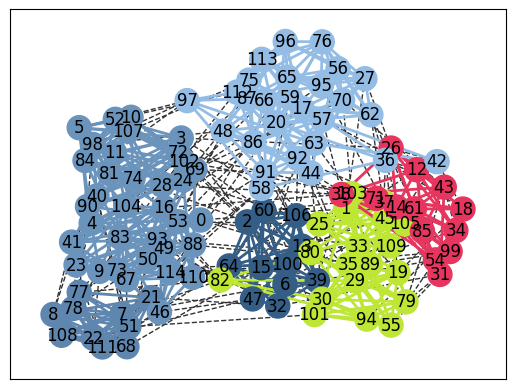

In [21]:
set_node(G, communities3)
set_edge(G)

node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = [get_color(G.edges[e]['community']) for e in internal]

dolph = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos=dolph, node_color=node_color)
nx.draw_networkx_labels(G, pos=dolph)
nx.draw_networkx_edges(G, pos=dolph, edgelist=external, edge_color='#333333', width=1, style='dashed')
nx.draw_networkx_edges(G, pos=dolph, edgelist=internal, edge_color=internal_color, width=2)

In [14]:
communities4 = sorted(community.asyn_lpa_communities(G), key=len, reverse=True)
print(len(communities4))
print(communities4)

10
[{0, 67, 4, 104, 9, 41, 73, 110, 46, 16, 49, 114, 83, 53, 23, 88, 93}, {96, 65, 97, 36, 70, 59, 76, 17, 113, 20, 87, 56, 58, 27, 63, 62, 95}, {68, 69, 7, 8, 11, 108, 77, 78, 111, 50, 51, 21, 22, 24, 90, 28}, {98, 3, 5, 102, 72, 40, 74, 10, 107, 81, 52, 84}, {64, 32, 2, 100, 6, 39, 106, 13, 47, 15, 60}, {35, 101, 79, 80, 82, 19, 55, 94, 29, 30}, {89, 1, 33, 37, 103, 105, 45, 109, 25}, {66, 75, 44, 48, 112, 86, 57, 91, 92}, {38, 42, 43, 12, 14, 85, 26}, {34, 99, 71, 18, 54, 61, 31}]


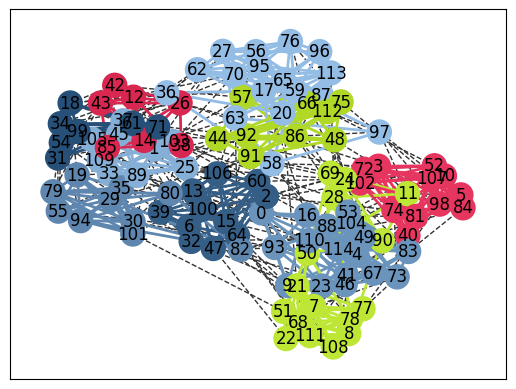

In [15]:
set_node(G, communities4)
set_edge(G)

node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = [get_color(G.edges[e]['community']) for e in internal]

dolph = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos=dolph, node_color=node_color)
nx.draw_networkx_labels(G, pos=dolph)
nx.draw_networkx_edges(G, pos=dolph, edgelist=external, edge_color='#333333', width=1, style='dashed')
nx.draw_networkx_edges(G, pos=dolph, edgelist=internal, edge_color=internal_color, width=2)

In [16]:
communities5 = sorted(community.label_propagation_communities(G), key=len, reverse=True)
print(len(communities5))
print(communities5)

9
[{1, 11, 24, 25, 28, 33, 36, 37, 45, 46, 49, 50, 53, 58, 59, 63, 67, 69, 73, 83, 88, 89, 90, 97, 103, 105, 109, 110, 114}, {19, 29, 30, 35, 42, 44, 48, 55, 57, 66, 75, 79, 80, 82, 86, 91, 92, 94, 101, 112}, {96, 65, 70, 76, 17, 113, 20, 87, 56, 27, 62, 95}, {98, 3, 5, 102, 72, 40, 74, 10, 107, 81, 52, 84}, {64, 32, 2, 100, 6, 39, 106, 13, 47, 15, 60}, {68, 7, 8, 108, 77, 78, 111, 51, 21, 22}, {0, 4, 104, 9, 41, 16, 23, 93}, {34, 99, 71, 18, 54, 61, 31}, {38, 43, 12, 14, 85, 26}]


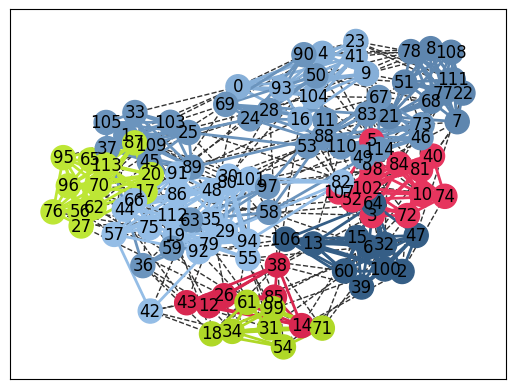

In [17]:
set_node(G, communities5)
set_edge(G)

node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = [get_color(G.edges[e]['community']) for e in internal]

dolph = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos=dolph, node_color=node_color)
nx.draw_networkx_labels(G, pos=dolph)
nx.draw_networkx_edges(G, pos=dolph, edgelist=external, edge_color='#333333', width=1, style='dashed')
nx.draw_networkx_edges(G, pos=dolph, edgelist=internal, edge_color=internal_color, width=2)

In [18]:
communities6 = sorted(community.louvain_communities(G), key=len, reverse=True)
print(len(communities6))
print(communities6)

10
[{0, 67, 4, 73, 9, 16, 83, 23, 88, 93, 104, 41, 110, 46, 49, 114, 53}, {65, 70, 76, 17, 20, 87, 27, 95, 96, 97, 36, 113, 56, 58, 59, 62, 63}, {34, 99, 38, 71, 42, 43, 12, 14, 18, 85, 54, 26, 61, 31}, {98, 3, 5, 102, 72, 40, 10, 74, 107, 81, 52, 84}, {32, 64, 2, 100, 6, 39, 106, 13, 15, 47, 60}, {35, 101, 79, 80, 82, 19, 55, 94, 29, 30}, {68, 7, 8, 108, 77, 78, 111, 51, 21, 22}, {33, 1, 37, 103, 105, 45, 109, 89, 25}, {66, 75, 44, 48, 112, 86, 57, 91, 92}, {50, 69, 24, 90, 11, 28}]


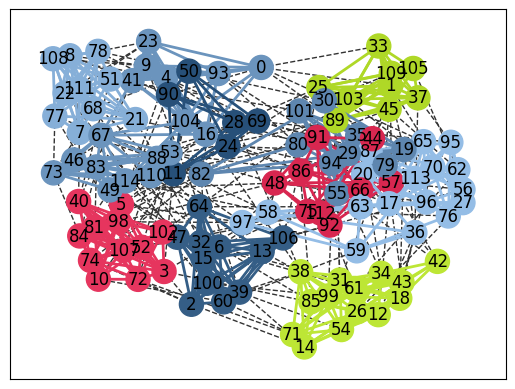

In [19]:
set_node(G, communities6)
set_edge(G)

node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = [get_color(G.edges[e]['community']) for e in internal]

dolph = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos=dolph, node_color=node_color)
nx.draw_networkx_labels(G, pos=dolph)
nx.draw_networkx_edges(G, pos=dolph, edgelist=external, edge_color='#333333', width=1, style='dashed')
nx.draw_networkx_edges(G, pos=dolph, edgelist=internal, edge_color=internal_color, width=2)

In [23]:
print(community.modularity(G,communities1))
print(community.modularity(G,communities2))
print(community.modularity(G,communities3))
print(community.modularity(G,communities4))
print(community.modularity(G,communities5))
print(community.modularity(G,communities6))

0.4003563359404315
0.5497406651426807
0.5682413929834553
0.5778244080804962
0.5521197863581082
0.5975625982984226
